In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
# load neuroscience publications
neuro_data = pd.read_csv('neuro_journals_doi.csv')

In [3]:
data_by_journal = neuro_data.groupby("journal").agg({"days_to_publish": ['mean', 'count']})
data_by_journal.columns = data_by_journal.columns.droplevel(0)
data_by_journal.head()

,mean,count
journal,,
2017 International Conference on Rehabilitation Robotics (ICORR),58.0,1
ACS Central Science,125.0,1
ACS Chemical Neuroscience,115.2,10
Acta Acustica united with Acustica,164.0,2
Acta Astronautica,71.0,1


Text(0, 0.5, 'days')

<Figure size 720x720 with 0 Axes>

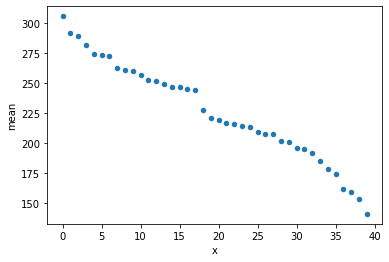

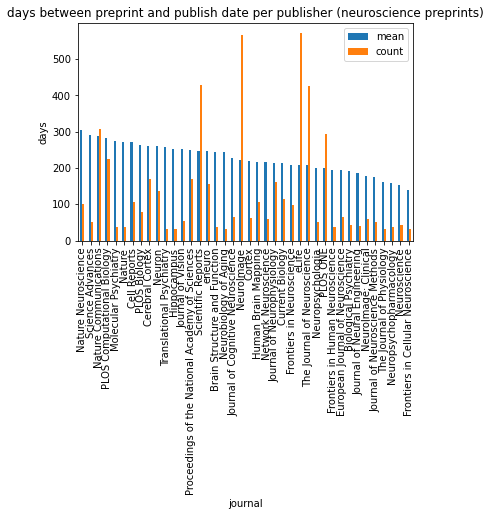

In [5]:
# plot length to publish per publisher
plt.figure(figsize=(10,10))
pop_journals = data_by_journal[data_by_journal['count']>30].sort_values(by='mean',ascending = False).reset_index()
pop_journals['x'] = pop_journals.index
ax1 = pop_journals.plot.scatter(x='x',
                      y='mean')#,                      s='count')
data_by_journal[data_by_journal['count']>30].sort_values(by='mean',ascending = False).plot.bar()
plt.title('days between preprint and publish date per publisher (neuroscience preprints)')
plt.ylabel('days')

In [ ]:
pop_journals = data_by_journal[data_by_journal['count']>30].sort_values(by='mean',ascending = False)
pop_journals = pop_journals.reset_index().melt('index', var_name='cols',  value_name='vals')
g = sns.catplot(x="index", y="vals", hue='cols', data=pop_journals, kind='point')